In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def utility_function(risk, u1, u0):
    return (risk * u1) + (u0 * (1 - risk))

In [4]:
# Cardiovascular event
u1 = 0 # Utility of a CVD event
u0 = 1 # Utility of no CVD event
risk_reduction = 0.5

# Side effect
u_side_1 = -1 # Utility of the side effect
u_side_0 = 0 # Utility of no side effect
p_side_treat = 0.1
p_side_no_treat = 0.0

# Risk (assume calibrated)
risk_no_treat = np.linspace(0, 1, 100)
risk_treat = risk_no_treat * (1-risk_reduction)
risk = risk_no_treat

# Conditional utilities
u_cond_no_treat = risk_no_treat*(u1-u0) + u0 + p_side_no_treat*(u_side_1-u_side_0) + u_side_0
u_cond_treat = risk_treat*(u1-u0) + u0 + p_side_treat*(u_side_1-u_side_0) + u_side_0
u_cond = (u0-u1)*(risk_no_treat - risk_treat) + (u_side_0 - u_side_1)*(p_side_no_treat - p_side_treat)
u_cond_alt = u_cond_treat - u_cond_no_treat
assert np.allclose(u_cond, u_cond_alt)

k_side = (u_side_0 - u_side_1)*(p_side_no_treat - p_side_treat)

optimal_threshold = k_side / (risk_reduction*(u1-u0))
print(optimal_threshold)

def ARR(x):
    return risk_reduction*x

0.2


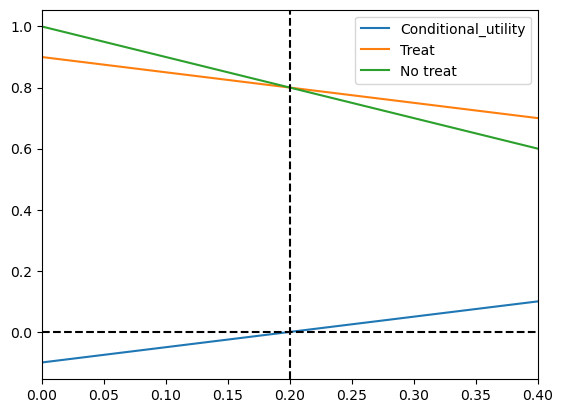

In [5]:
plt.close()
plt.plot(risk, u_cond, label='Conditional_utility')
plt.plot(risk, u_cond_treat, label='Treat')
plt.plot(risk, u_cond_no_treat, label='No treat')
plt.axvline(optimal_threshold, linestyle='--', color = 'k', label="_nolegend_")
plt.axhline(0, linestyle='--', color = 'k', label="_nolegend_")
plt.plot()
plt.xlim(0, 0.4)
plt.legend()
plt.show()

In [6]:
# ASCVD utility fn
ldl_values = np.array([70, 190]) / 38.67
ldl_risk_values = np.array([0.05, 0.2])
slope = (ldl_values[1] - ldl_values[0]) / (np.log(ldl_risk_values[1]) - np.log(ldl_risk_values[0]))
print(slope)
def get_ldl_untreated(x):
    x = np.maximum(x, 1e-6)
    return np.maximum((np.log(x) - np.log(ldl_risk_values[0])) * slope + ldl_values[0], 0)

2.2384717469184845


In [14]:
def get_ldl_untreated(x):
    coefs = [3.16767331, 0.07156838]
    x = np.maximum(x, 1e-15)
    return np.maximum(np.log(x) * coefs[1] + coefs[0], 0)
#     return np.maximum((np.log(x) - np.log(ldl_risk_values[0])) * slope + ldl_values[0], 0)

In [15]:
ldl_reduction = 0.43
ldl_untreated = get_ldl_untreated(risk_no_treat)
ldl_treated = ldl_untreated * (1-ldl_reduction)

In [16]:
risk_reduction = 0.78**(ldl_untreated - ldl_treated)
risk_treat = (1-risk_reduction)*risk_no_treat
risk = risk_no_treat
arr = risk_no_treat - risk_treat

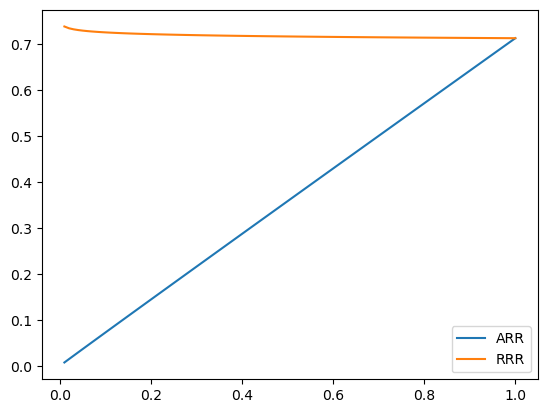

In [25]:
plt.close()
plt.plot(risk_no_treat[1:], arr[1:], label='ARR')
plt.plot(risk_no_treat[1:], risk_reduction[1:], label='RRR')
plt.legend()
plt.show()

In [124]:
risk_reduction

array([1.        , 1.        , 1.        , 0.92901083, 0.86724358,
       0.82217564, 0.7870966 , 0.75860797, 0.73476482, 0.71435648,
       0.69658139, 0.68088319, 0.66686097, 0.65421693, 0.64272421,
       0.63220629, 0.6225233 , 0.61356266, 0.60523251, 0.59745697,
       0.59017271, 0.58332637, 0.57687255, 0.57077238, 0.56499234,
       0.55950329, 0.55427978, 0.54929949, 0.54454267, 0.53999186,
       0.53563146, 0.53144755, 0.52742762, 0.52356043, 0.5198358 ,
       0.5162445 , 0.51277814, 0.5094291 , 0.50619038, 0.5030556 ,
       0.50001886, 0.49707477, 0.49421835, 0.49144498, 0.48875041,
       0.48613067, 0.4835821 , 0.48110127, 0.478685  , 0.47633032,
       0.47403445, 0.47179478, 0.46960888, 0.46747446, 0.46538936,
       0.46335158, 0.46135919, 0.45941042, 0.45750355, 0.455637  ,
       0.45380924, 0.45201885, 0.45026446, 0.44854479, 0.44685861,
       0.44520477, 0.44358217, 0.44198974, 0.4404265 , 0.43889149,
       0.4373838 , 0.43590257, 0.43444696, 0.4330162 , 0.43160

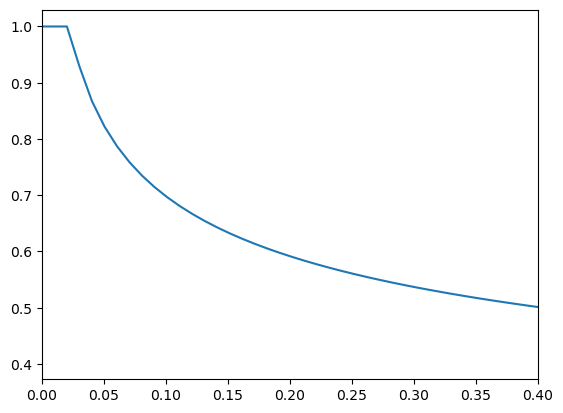

In [125]:
plt.close()
plt.plot(risk_no_treat, risk_reduction)
plt.xlim(0, 0.4)
plt.show()

In [120]:
# Conditional utilities
u_cond_no_treat = risk_no_treat*(u1-u0) + u0 + p_side_no_treat*(u_side_1-u_side_0) + u_side_0
u_cond_treat = risk_treat*(u1-u0) + u0 + p_side_treat*(u_side_1-u_side_0) + u_side_0
u_cond = (u0-u1)*(risk_no_treat - risk_treat) + (u_side_0 - u_side_1)*(p_side_no_treat - p_side_treat)
u_cond_alt = u_cond_treat - u_cond_no_treat

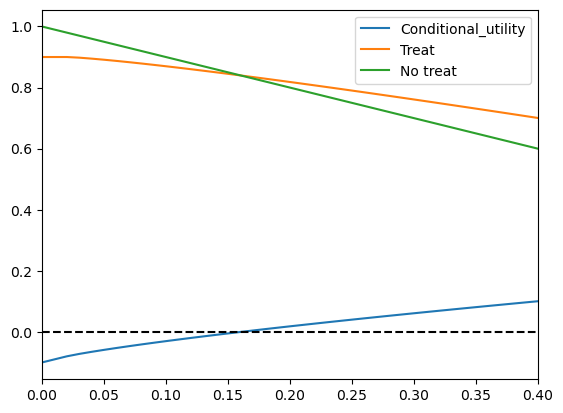

In [121]:
plt.close()
plt.plot(risk, u_cond, label='Conditional_utility')
plt.plot(risk, u_cond_treat, label='Treat')
plt.plot(risk, u_cond_no_treat, label='No treat')
# plt.axvline(optimal_threshold, linestyle='--', color = 'k', label="_nolegend_")
plt.axhline(0, linestyle='--', color = 'k', label="_nolegend_")
plt.plot()
plt.xlim(0, 0.4)
plt.legend()
plt.show()